In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import models,layers
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout, MaxPooling2D
import pickle


In [2]:
path = "E:/downloads/3rd sem engineering/WEB  DEVELOPMENT/Major Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"  # Replace with the path to your dataset
className = os.listdir(path)
className.sort() 
imageData = []
labelData = []

for count, folder in enumerate(className):
    folder_path = os.path.join(path, folder)
    images = os.listdir(folder_path)
    print("Loading Folder --", folder, "The Count of Classes ==> ", count)
    for img in images:
        image = cv2.imread(os.path.join(folder_path, img))
        image = cv2.resize(image, (64, 64))
        imageData.append(image)
        labelData.append(count)

print("---- Data Loading Done ----")


Loading Folder -- Apple___Apple_scab The Count of Classes ==>  0
Loading Folder -- Apple___Black_rot The Count of Classes ==>  1
Loading Folder -- Apple___Cedar_apple_rust The Count of Classes ==>  2
Loading Folder -- Apple___healthy The Count of Classes ==>  3
Loading Folder -- Blueberry___healthy The Count of Classes ==>  4
Loading Folder -- Cherry_(including_sour)___Powdery_mildew The Count of Classes ==>  5
Loading Folder -- Cherry_(including_sour)___healthy The Count of Classes ==>  6
Loading Folder -- Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot The Count of Classes ==>  7
Loading Folder -- Corn_(maize)___Common_rust_ The Count of Classes ==>  8
Loading Folder -- Corn_(maize)___Northern_Leaf_Blight The Count of Classes ==>  9
Loading Folder -- Corn_(maize)___healthy The Count of Classes ==>  10
Loading Folder -- Grape___Black_rot The Count of Classes ==>  11
Loading Folder -- Grape___Esca_(Black_Measles) The Count of Classes ==>  12
Loading Folder -- Grape___Leaf_blight_(Is

In [3]:
data = np.array(imageData)
data = data.astype("float32")
data = data/255.0

label = np.array(labelData)
print(data.shape)
label_num = to_categorical(label, len(className))
len(label_num)

(70243, 64, 64, 3)


70243

In [4]:

x_data, y_data = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(56194, 64, 64, 3) (56194, 38) (14049, 64, 64, 3) (14049, 38)


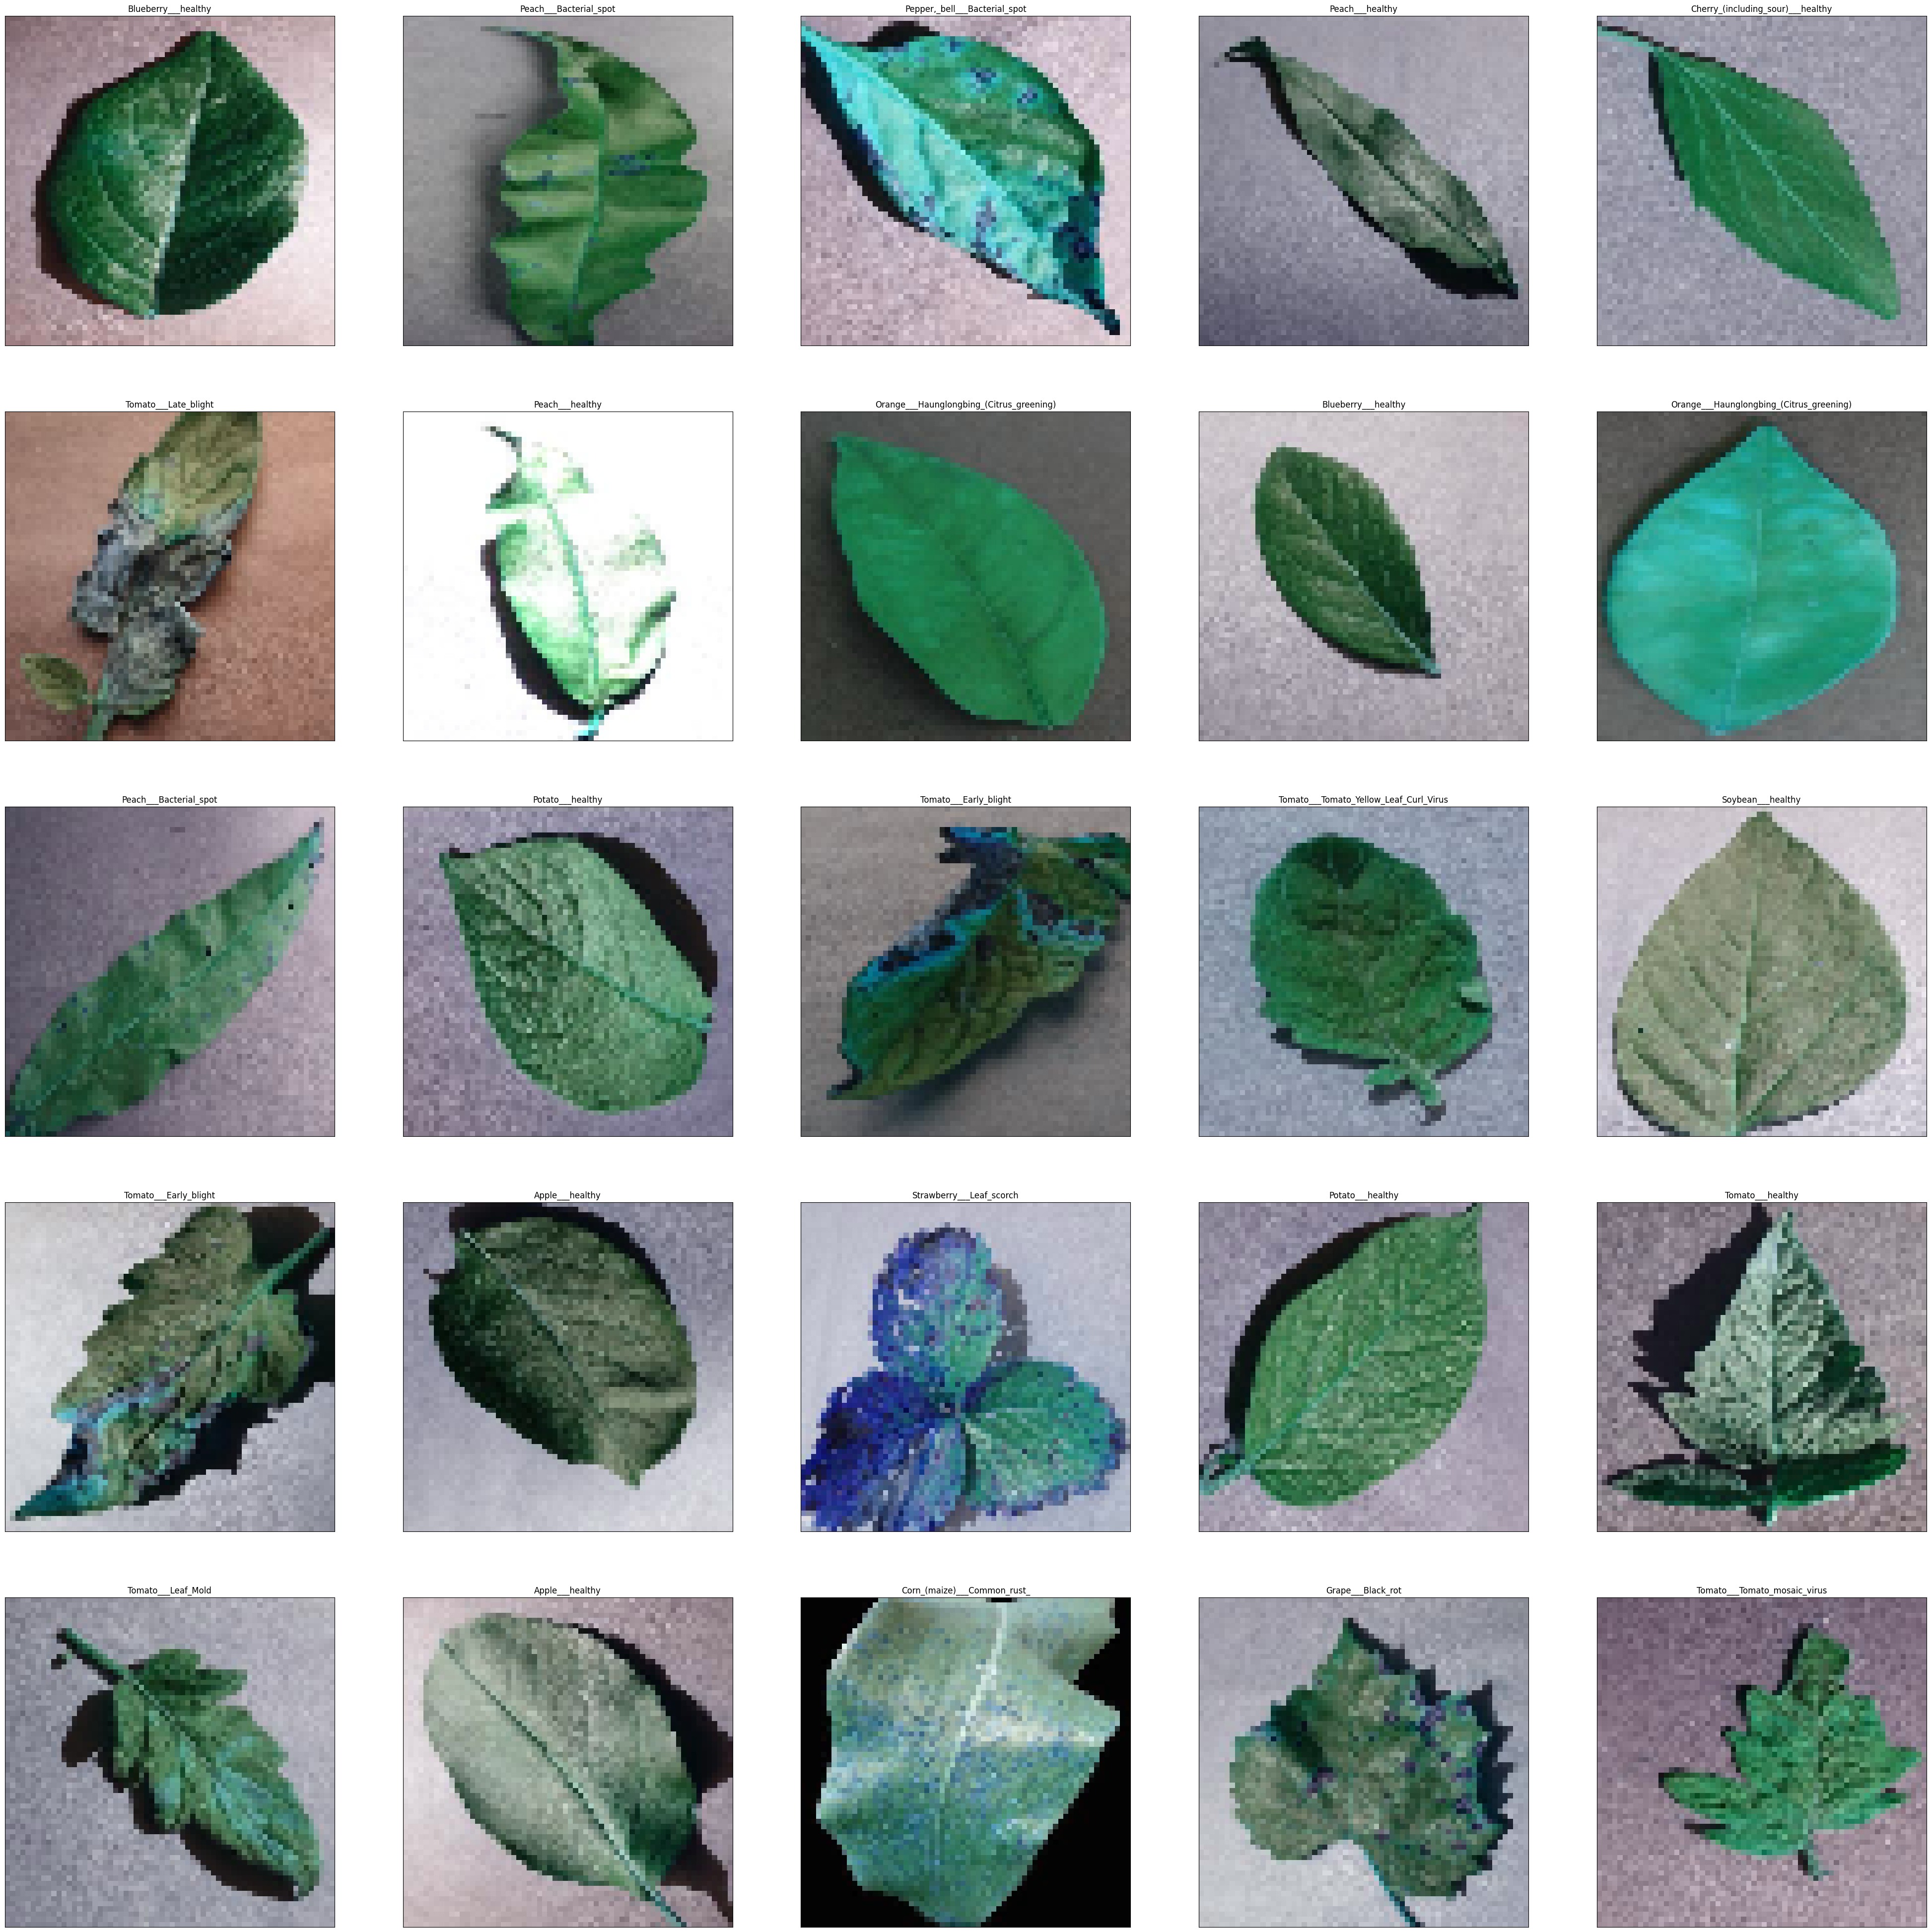

In [5]:
plt.figure(figsize=(50, 50))
for i in range(0,25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(className[np.argmax(y_train[i])])
    plt.imshow(x_train[i])

In [6]:

# Create and compile the CNN model
model = k.models.Sequential()

model.add(Conv2D(16, (5, 5), activation="relu", input_shape=(64, 64, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (4, 4), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(len(className), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [7]:
print("hello")
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), validation_split=0.4)

hello
Epoch 1/50


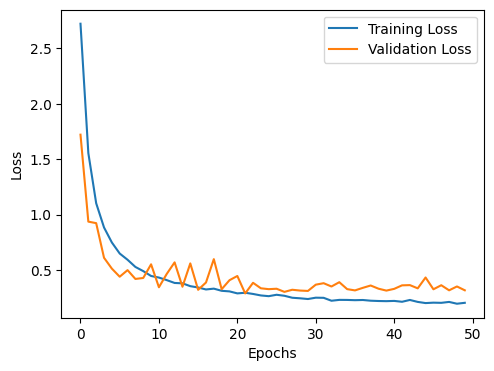

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



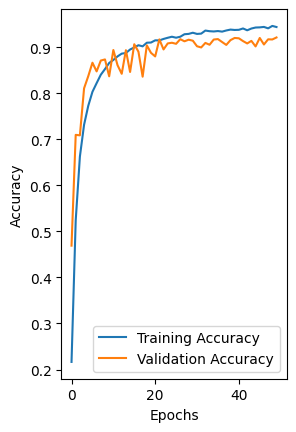

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy on Testing Data: {accuracy * 100:.2f}%")
print(f"Loss on Testing Data: {loss:.4f}")


440/440 [==============================] - 26s 58ms/step - loss: 0.3172 - accuracy: 0.9211
Accuracy on Testing Data: 92.11%
Loss on Testing Data: 0.3172


In [ ]:

def predict_single_image(image_path, model, classNames):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))
    image = image.astype("float32") / 255.0
    image = np.reshape(image, [1, 64, 64, 3])
    prediction = model.predict(image)[0]
    predicted_class = classNames[np.argmax(prediction)]
    return predicted_class


In [ ]:

image_path = input() # Replace with the path to your image
predicted_class = predict_single_image(image_path, model, className)
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 32ms/step
Predicted Class: Squash___Powdery_mildew


In [ ]:

# Get a list of existing model version directories in the parent directory
existing_model_versions = [int(i) for i in os.listdir("../") if i.isdigit()]

# Find the maximum existing version number, or use 0 if none exist
if existing_model_versions:
    max_version = max(existing_model_versions)
else:
    max_version = 0

# Increment the maximum version number by 1 for the new model version
model_version = max_version + 1

# Save the model to the new version directory
model.save(f"./{model_version}")

INFO:tensorflow:Assets written to: ./1\assets


INFO:tensorflow:Assets written to: ./1\assets
